# DS_Project: Restaurant Rating Prediction

This project predicts restaurant ratings using features like location, cuisine, price, and customer votes. We clean and analyze the data, build machine learning models, and compare their performance to find the best model for accurate rating prediction..

__Import Libraries:__

We import all libraries needed for data processing, visualization, and model building.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

__Load and Inspect Dataset:__

In [2]:
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\zomato_dataset.csv\zomato_dataset.csv")

In [3]:
df

,Restaurant Name,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Cuisine,Place Name,City,Item Name,Best Seller,Votes,Prices
0,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Platter Kebab Combo,BESTSELLER,84,249.0
1,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Rumali Shawarma,BESTSELLER,45,129.0
2,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Tandoori Salad,NaN,39,189.0
3,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken BBQ Salad,BESTSELLER,43,189.0
4,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Special Doner Wrap Combo,MUST TRY,31,205.0
...,...,...,...,...,...,...,...,...,...,...,...,...
123652,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Murgh Reshmi Kebab,NaN,0,525.0
123653,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Murgh Large Tikka,NaN,0,525.0
123654,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Murgh Chukandri Tikka,NaN,0,525.0
123655,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Murgh Golden Kebab,NaN,0,525.0


In [4]:
df.shape

(123657, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123657 entries, 0 to 123656
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Restaurant Name  123657 non-null  object 
 1   Dining Rating    91421 non-null   float64
 2   Delivery Rating  122377 non-null  float64
 3   Dining Votes     123657 non-null  int64  
 4   Delivery Votes   123657 non-null  int64  
 5   Cuisine          123657 non-null  object 
 6   Place Name       123657 non-null  object 
 7   City             123657 non-null  object 
 8   Item Name        123657 non-null  object 
 9   Best Seller      27942 non-null   object 
 10  Votes            123657 non-null  int64  
 11  Prices           123657 non-null  float64
dtypes: float64(3), int64(3), object(6)
memory usage: 11.3+ MB


In [6]:
df.describe()

,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Votes,Prices
count,91421.000000,122377.000000,123657.000000,123657.000000,123657.000000,123657.000000
mean,3.822264,3.963184,152.729858,115.763725,24.666772,241.378399
std,0.408693,0.245900,232.214061,243.970828,125.236009,192.830713
min,2.500000,2.500000,0.000000,0.000000,0.000000,0.950000
25%,3.600000,3.800000,0.000000,0.000000,0.000000,130.000000
50%,3.900000,4.000000,30.000000,0.000000,0.000000,208.570000
75%,4.100000,4.100000,217.000000,23.000000,15.000000,299.000000
max,4.800000,4.600000,997.000000,983.000000,9750.000000,12024.000000


__Data Cleaning:__

In [7]:
df.isnull().sum()

Restaurant Name        0
Dining Rating      32236
Delivery Rating     1280
Dining Votes           0
Delivery Votes         0
Cuisine                0
Place Name             0
City                   0
Item Name              0
Best Seller        95715
Votes                  0
Prices                 0
dtype: int64

In [8]:
df.columns

Index(['Restaurant Name', 'Dining Rating', 'Delivery Rating', 'Dining Votes',
       'Delivery Votes', 'Cuisine ', 'Place Name', 'City', 'Item Name',
       'Best Seller', 'Votes', 'Prices'],
      dtype='object')

In [9]:
df['Dining Rating'] = df['Dining Rating'].fillna(df['Dining Rating'].median())
df['Delivery Rating'] = df['Delivery Rating'].fillna(df['Delivery Rating'].median())

In [10]:
df['Best Seller']=df['Best Seller'].fillna(df['Best Seller'].mode()[0])

In [11]:
df.isnull().sum().sum()

0

In [12]:
# Create an overall rating as average of dining and delivery ratings
df["Overall_Rating"] = (df["Dining Rating"] + df["Delivery Rating"])/2

In [13]:
print(df["Overall_Rating"].describe())

count    123657.000000
mean          3.903047
std           0.238619
min           3.000000
25%           3.750000
50%           3.950000
75%           4.050000
max           4.650000
Name: Overall_Rating, dtype: float64


In [14]:
df=df.drop_duplicates()

In [15]:
df.shape

(101463, 13)

__EDA (Exploratory Data Analysis):__

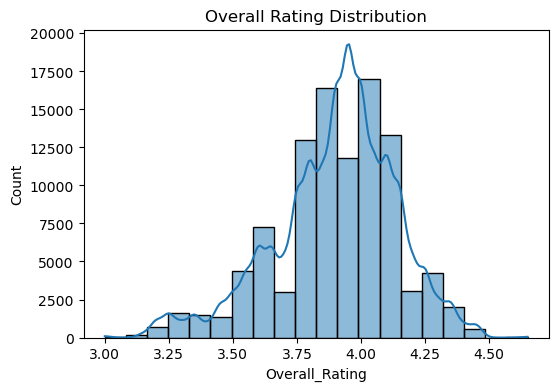

In [16]:
plt.figure(figsize=(6,4))
sns.histplot(df["Overall_Rating"], bins=20,kde=True)
plt.title("Overall Rating Distribution")
plt.show()

__Interpretation:__
The ratings follow a normal, bell-shaped distribution. Most restaurants have ratings between 3.6 and 4.2. Very low and very high ratings are rare, showing that restaurants generally receive similar mid-to-high ratings.

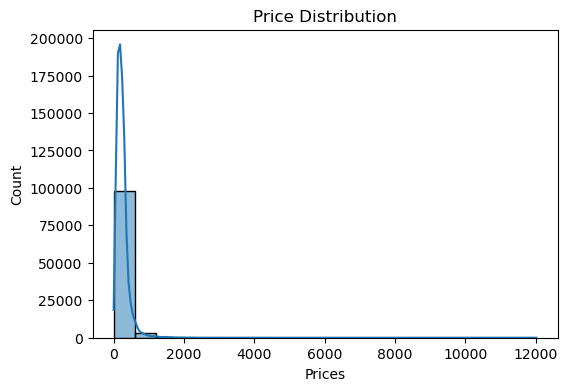

In [17]:
plt.figure(figsize=(6,4))
sns.histplot(df["Prices"],bins=20,kde=True)
plt.title("Price Distribution")
plt.show()

__Interpretation:__
Most restaurants fall into the lower price range, and only a few have very high prices. The distribution is right-skewed, meaning expensive restaurants are uncommon compared to affordable ones.

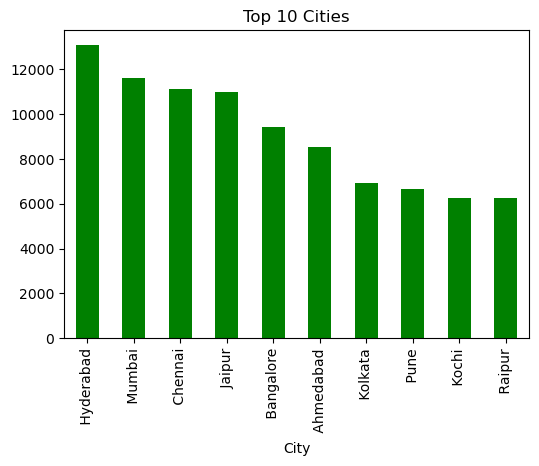

In [19]:
df['City'].value_counts().head(10).plot(kind='bar',figsize=(6,4),color='green')
plt.title("Top 10 Cities")
plt.show()

__Interpretation:__
Cities like Hyderabad, Mumbai, Chennai, and Jaipur have the highest number of restaurants in the dataset. This indicates that these major cities dominate the restaurant listings and contribute the most data.

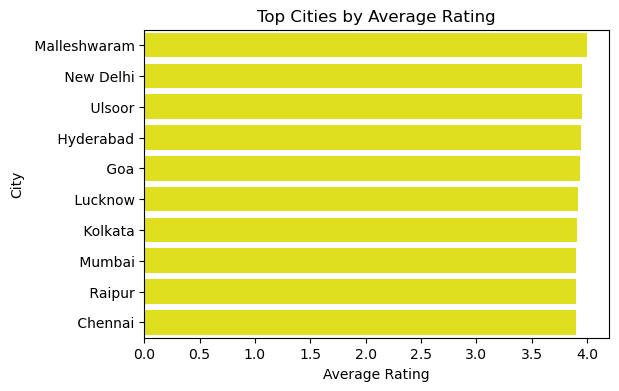

In [18]:
city_avg = df.groupby("City")["Overall_Rating"].mean().sort_values(ascending = False).head(10)
plt.figure(figsize=(6,4))
sns.barplot(x=city_avg.values, y=city_avg.index,color='yellow')
plt.title("Top Cities by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("City")
plt.show()

__Interpretation:__
Cities such as Malleshwaram, New Delhi, Ulsoor, and Hyderabad show slightly higher average ratings. However, the differences between cities are small, meaning city does not drastically influence ratings.

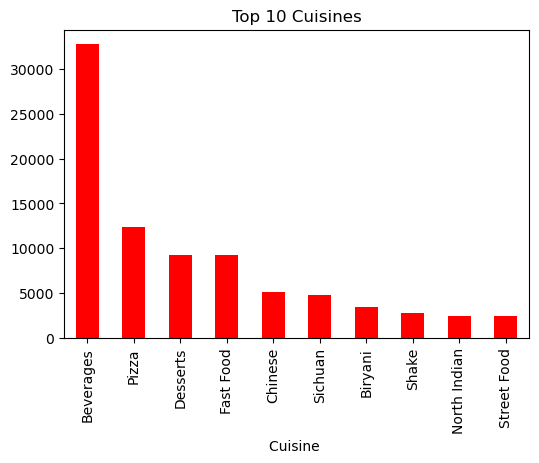

In [20]:
df['Cuisine '].value_counts().head(10).plot(kind='bar',figsize=(6,4),color='red')
plt.title("Top 10 Cuisines")
plt.show()

__Interpretation:__
Cuisines like Beverages, Pizza, Desserts, and Fast Food are the most common in the dataset. This shows customer preference and restaurant supply are highest for these cuisine types.

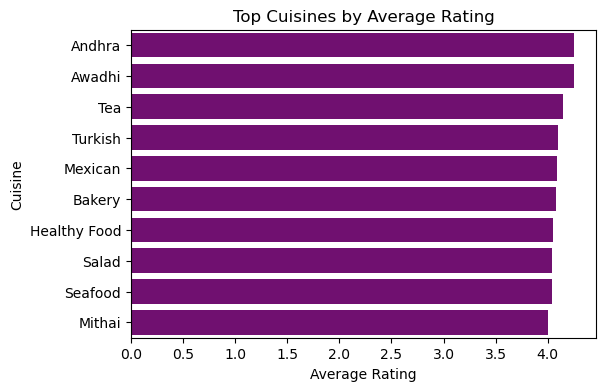

In [21]:
cuisine_avg = df.groupby("Cuisine ")["Overall_Rating"].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(6,4))
sns.barplot(x=cuisine_avg.values, y=cuisine_avg.index,color="purple")
plt.title("Top Cuisines by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Cuisine")
plt.show()

__Interpretation:__
Cuisines such as Andhra, Awadhi, Tea, and Turkish have the highest average ratings. This suggests customers rate these cuisines slightly better than others, though the difference is not very large.

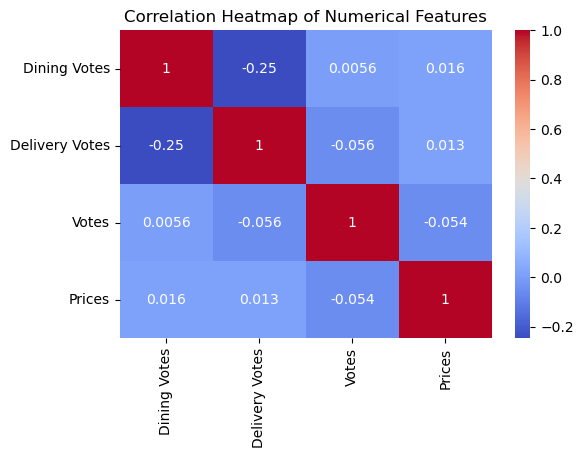

In [22]:
plt.figure(figsize=(6,4))
numeric_features = ["Dining Votes","Delivery Votes","Votes","Prices"]
sns.heatmap(df[numeric_features].corr(),annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

__Interpretation:__
The correlations between numerical features (Dining Votes, Delivery Votes, Votes, Prices) are weak. No pair of features shows strong correlation. This means: 
1) No multicollinearity problem
2) Each feature contributes independently to the model

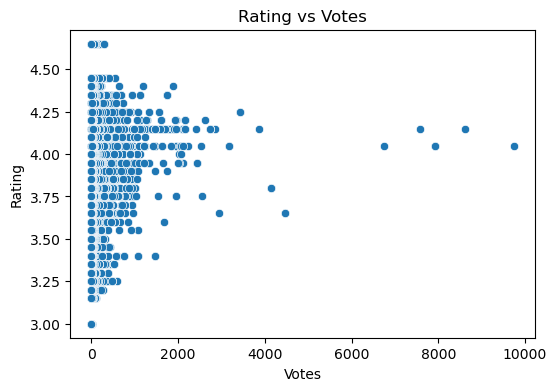

In [23]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['Votes'], y=df['Overall_Rating'])
plt.title("Rating vs Votes")
plt.xlabel("Votes")
plt.ylabel("Rating")
plt.show()

__Interpretation:__
There is no strong relationship between rating and number of votes. Restaurants with many votes can still have both high or moderate ratings. This means popularity (votes) does not strongly determine rating.

__Feature Engineering:__

In [25]:
df.loc[:,'cost_per_person'] = df['Prices']

In [27]:
df.loc[:,"total_votes"] = df["Dining Votes"] + df["Delivery Votes"] + df["Votes"]

In [29]:
df.loc[:,"rating_diff"] = df["Dining Rating"] - df["Delivery Rating"]

In [31]:
df.loc[:,"online_delivery_flag"] = np.where(df["Delivery Votes"] > 0, 1, 0)

In [32]:
df.head()

,Restaurant Name,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Cuisine,Place Name,City,Item Name,Best Seller,Votes,Prices,Overall_Rating,cost_per_person,total_votes,rating_diff,online_delivery_flag
0,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Platter Kebab Combo,BESTSELLER,84,249.0,4.05,249.0,123,-0.3,0
1,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Rumali Shawarma,BESTSELLER,45,129.0,4.05,129.0,84,-0.3,0
2,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Tandoori Salad,BESTSELLER,39,189.0,4.05,189.0,78,-0.3,0
3,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken BBQ Salad,BESTSELLER,43,189.0,4.05,189.0,82,-0.3,0
4,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Special Doner Wrap Combo,MUST TRY,31,205.0,4.05,205.0,70,-0.3,0


In [33]:
df.columns

Index(['Restaurant Name', 'Dining Rating', 'Delivery Rating', 'Dining Votes',
       'Delivery Votes', 'Cuisine ', 'Place Name', 'City', 'Item Name',
       'Best Seller', 'Votes', 'Prices', 'Overall_Rating', 'cost_per_person',
       'total_votes', 'rating_diff', 'online_delivery_flag'],
      dtype='object')

In [34]:
numeric_features = ["Dining Votes","Delivery Votes","Votes","Prices"]
categorical_features = ["Cuisine ","Place Name","City","Best Seller"]

In [35]:
df_model = df[numeric_features + categorical_features + ["Overall_Rating"]]

In [36]:
df_model.head()

,Dining Votes,Delivery Votes,Votes,Prices,Cuisine,Place Name,City,Best Seller,Overall_Rating
0,39,0,84,249.0,Fast Food,Malakpet,Hyderabad,BESTSELLER,4.05
1,39,0,45,129.0,Fast Food,Malakpet,Hyderabad,BESTSELLER,4.05
2,39,0,39,189.0,Fast Food,Malakpet,Hyderabad,BESTSELLER,4.05
3,39,0,43,189.0,Fast Food,Malakpet,Hyderabad,BESTSELLER,4.05
4,39,0,31,205.0,Fast Food,Malakpet,Hyderabad,MUST TRY,4.05


In [37]:
# One-Hot Encoding:
df_model = pd.get_dummies(df_model, columns=categorical_features, drop_first=True)

In [38]:
# Split into x and y
x = df_model.drop("Overall_Rating",axis=1)

In [39]:
y = df_model["Overall_Rating"]

__Train-test split:__ 

Splits the dataset into training and testing sets (80/20)

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=80)

In [42]:
x_train.shape, x_test.shape

((81170, 402), (20293, 402))

In [43]:
y_train.shape, y_test.shape

((81170,), (20293,))

__Standard Scaling:__

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
scaling = StandardScaler()

In [46]:
x_train = scaling.fit_transform(x_train)

In [47]:
x_test = scaling.transform(x_test)

__Model Building:__

__1. Linear Regression:__

Linear Regression predicts a number by finding a straight-line relationship between the features and the target.Linear Regression serves as a simple and interpretable baseline model.

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
lr = LinearRegression()

In [50]:
lr.fit(x_train,y_train)

LinearRegression()

In [51]:
y_hat_train_lr = lr.predict(x_train)

In [52]:
y_hat_train_lr

array([3.90462775, 4.17141242, 3.87618537, ..., 3.82656379, 3.75829596,
       3.70205207])

In [53]:
y_hat_test_lr = lr.predict(x_test)

In [54]:
y_hat_test_lr

array([3.91713996, 3.85583014, 3.9764051 , ..., 3.84334845, 3.94127936,
       3.9685926 ])

In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [56]:
print("\nLinear Regression Results:\n")
print("Train Metrics:")
print("Train MAE:",mean_absolute_error(y_train,y_hat_train_lr))
print("Train MSE:",mean_squared_error(y_train,y_hat_train_lr))
print("Train RMSE:",np.sqrt(mean_squared_error(y_train,y_hat_train_lr)))
print("Train R-squared:", r2_score(y_train,y_hat_train_lr))

print("\nTest Metrics:")
print("Test MAE:",mean_absolute_error(y_test,y_hat_test_lr))
print("Test MSE:",mean_squared_error(y_test,y_hat_test_lr))
print("Test RMSE:",np.sqrt(mean_squared_error(y_test,y_hat_test_lr)))
print("Test R-squared:", r2_score(y_test,y_hat_test_lr))


Linear Regression Results:

Train Metrics:
Train MAE: 0.11293655454694802
Train MSE: 0.027956596839419128
Train RMSE: 0.16720226326045687
Train R-squared: 0.5088481694200431

Test Metrics:
Test MAE: 0.11256907327091349
Test MSE: 0.02768872910749678
Test RMSE: 0.1663993062109839
Test R-squared: 0.5097850025248476


__Interpretation:__

The model performs almost the same on both training and test data, which means it is not overfitting.

The MAE (~0.11) shows the model’s predictions are, on average, only 0.11 rating points away from the actual value, which is quite accurate given the small range of ratings.

The R-squared value (~0.51) indicates the model explains about 50% of the variation in restaurant ratings. This is reasonable because ratings usually depend on many factors and have a narrow range.

Overall, the Linear Regression model provides a stable and moderately good prediction performance.

In [57]:
lr_coeff = pd.Series(lr.coef_ ,index=x.columns).sort_values(ascending=False)
print("\nLinear Regression coefficients:")
print(lr_coeff.head(10))


Linear Regression coefficients:
Place Name_Kaiserbagh      1.157389e+12
City_ Jaipur               5.974621e+11
City_ Kolkata              5.533472e+11
Place Name_Gomti Nagar     4.710676e+11
City_ Raipur               4.654521e+11
Place Name_Aliganj         3.770187e+11
City_ Goa                  3.099408e+11
Place Name_Chembur         3.096981e+11
Place Name_Nirala Nagar    2.989701e+11
Place Name_Egmore          2.856891e+11
dtype: float64


__2. Random Forest Regressor:__

Random Forest is an ensemble machine learning model that builds many decision trees and combines their results to make more accurate and stable predictions. It reduces overfitting and works well when the data has many features or non-linear relationships.

In [58]:
from sklearn.ensemble import RandomForestRegressor

In [59]:
rf = RandomForestRegressor(n_estimators=200, random_state=80,max_depth=15,min_samples_split=10,min_samples_leaf=5)

In [60]:
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=15, min_samples_leaf=5, min_samples_split=10,
                      n_estimators=200, random_state=80)

In [61]:
y_hat_train_rf = rf.predict(x_train)

In [62]:
y_hat_train_rf

array([3.89449055, 4.01881418, 3.55392019, ..., 3.88713489, 3.5988266 ,
       3.79026134])

In [63]:
y_hat_test_rf = rf.predict(x_test)

In [64]:
y_hat_test_rf

array([3.86561785, 3.98839207, 3.91058993, ..., 3.92389345, 3.98976238,
       3.98839207])

In [65]:
print("\nRandom Forest Regressor Results:\n")
print("Train Metrics:")
print("Train MAE:",mean_absolute_error(y_train,y_hat_train_rf))
print("Test MSE:",mean_squared_error(y_train,y_hat_train_rf))
print("Test RMSE:",np.sqrt(mean_squared_error(y_train,y_hat_train_rf)))
print("Test R-squared:", r2_score(y_train,y_hat_train_rf))

print("\nTest Metrics:")
print("MAE:",mean_absolute_error(y_test,y_hat_test_rf))
print("MSE:",mean_squared_error(y_test,y_hat_test_rf))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_hat_test_rf)))
print("R-squared:", r2_score(y_test,y_hat_test_rf))


Random Forest Regressor Results:

Train Metrics:
Train MAE: 0.086828933255537
Test MSE: 0.016285530017492045
Test RMSE: 0.12761477194075946
Test R-squared: 0.7138897868721331

Test Metrics:
MAE: 0.08685543839833323
MSE: 0.01634616645860436
RMSE: 0.1278521273135663
R-squared: 0.7105993591066053


__Interpretation:__

The model shows very similar performance on both training and test data, which means it is not overfitting.

The MAE (~0.086) indicates the predictions are very close to the actual ratings, with only a small average error.

The R-squared value (~0.71) shows that the model explains around 71% of the variation in restaurant ratings, which is a strong improvement compared to Linear Regression.

Overall, the Random Forest model provides high accuracy and strong predictive performance, making it a reliable choice for rating prediction.

In [66]:
# Top 10 feature importance from Random Forest:
feature_imp = pd.DataFrame({
    "feature":x.columns,
    "importance": rf.feature_importances_
}).sort_values("importance",ascending=False)

print("\nTop 10 features by importance:")
print(feature_imp.head(10))


Top 10 features by importance:
                     feature  importance
0               Dining Votes    0.432487
1             Delivery Votes    0.061867
8         Cuisine _Beverages    0.020605
376            City_ Chennai    0.020486
314      Place Name_Sector 1    0.017402
266  Place Name_Nungambakkam    0.016520
262   Place Name_Navrangpura    0.015452
14         Cuisine _Desserts    0.014356
157     Place Name_Gopalpura    0.013748
31          Cuisine _Mughlai    0.013430


__Model Comparison:__ 


__Linear Regression vs Random Forest Regressor__

The Random Forest model performs significantly better than Linear Regression.

Random Forest achieves a lower MAE (~ 0.086) compared to Linear Regression (~ 0.11), meaning its predictions are more accurate.
The R-squared value also improves from about 0.50 (Linear Regression) to 0.71 (Random Forest), showing that Random Forest explains much more of the variation in restaurant ratings.

Overall, Random Forest provides stronger, more reliable prediction performance and is clearly the better model for this dataset.

__Prediction Function:__

In [67]:
feature_columns = x.columns.tolist()
def predict_restaurant_rating(dining_votes, delivery_votes, votes, price, cuisine, place_name, city, best_seller,
                              model = rf, feature_cols = feature_columns):
    """
    Predict overall restaurant rating using the trained Random Forest model.
    """

    row = {
        "Dining Votes": dining_votes,
        "Delivery Votes": delivery_votes,
        "Votes": votes,
        "Prices": price,
        "Cuisine": cuisine,
        "Place Name": place_name,
        "City": city,
        "Best Seller": best_seller
    }
    new = pd.DataFrame([row])

    new_encoded = pd.get_dummies(new, columns = [c for c in ["Cuisine","Place Name","City","Best Seller"] if c in new.columns], drop_first=True)
    new_encoded = new_encoded.reindex(columns = feature_columns, fill_value=0)

    predicted_rating = model.predict(new_encoded.values)[0]
    return predicted_rating

example_rating = predict_restaurant_rating(
    dining_votes=100,
    delivery_votes=50,
    votes=120,
    price=250,
    cuisine="Fast Food",
    place_name="Malakpet",
    city="Hyderabad",
    best_seller="BESTSELLER"
)
print(f"\nPredicted overall rating for example restaurant: {example_rating:.2f}")


Predicted overall rating for example restaurant: 3.89


__Interpretation:__

The prediction function takes the restaurant details (votes, price, cuisine, city, etc.), converts them into the same format used during training, and then uses the Random Forest model to predict the restaurant’s rating.

In the example, the model predicts a rating of 3.89, meaning a restaurant with those features (good number of votes, average price, Fast Food cuisine, located in Hyderabad) is expected to have a moderately high rating.

__Final Conclusion:__

Both models were able to predict restaurant ratings with reasonable accuracy, but the Random Forest Regressor performed much better than Linear Regression.

Random Forest achieved lower error values and a higher R-squared score, showing it captures the relationships in the data more effectively.

Overall, __Random Forest is the best-performing model__ for this project and provides reliable predictions for restaurant ratings.